In [78]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [25]:
data = sm.datasets.fair.load_pandas().data 


In [26]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [27]:
data.shape


(6366, 9)

In [28]:
target = pd.DataFrame([], columns = ['affair'])

In [29]:
data = pd.concat([data,target], axis =1)
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,NaN
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,NaN
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,NaN
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,NaN
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,NaN


In [30]:
data.isnull().sum()

rate_marriage         0
age                   0
yrs_married           0
children              0
religious             0
educ                  0
occupation            0
occupation_husb       0
affairs               0
affair             6366
dtype: int64

In [55]:
#data.drop(['affair'],axis = 1)
#data['affair'] = data['affairs'].apply(lambda x: 1 if x > 0 else 0)


In [72]:

data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


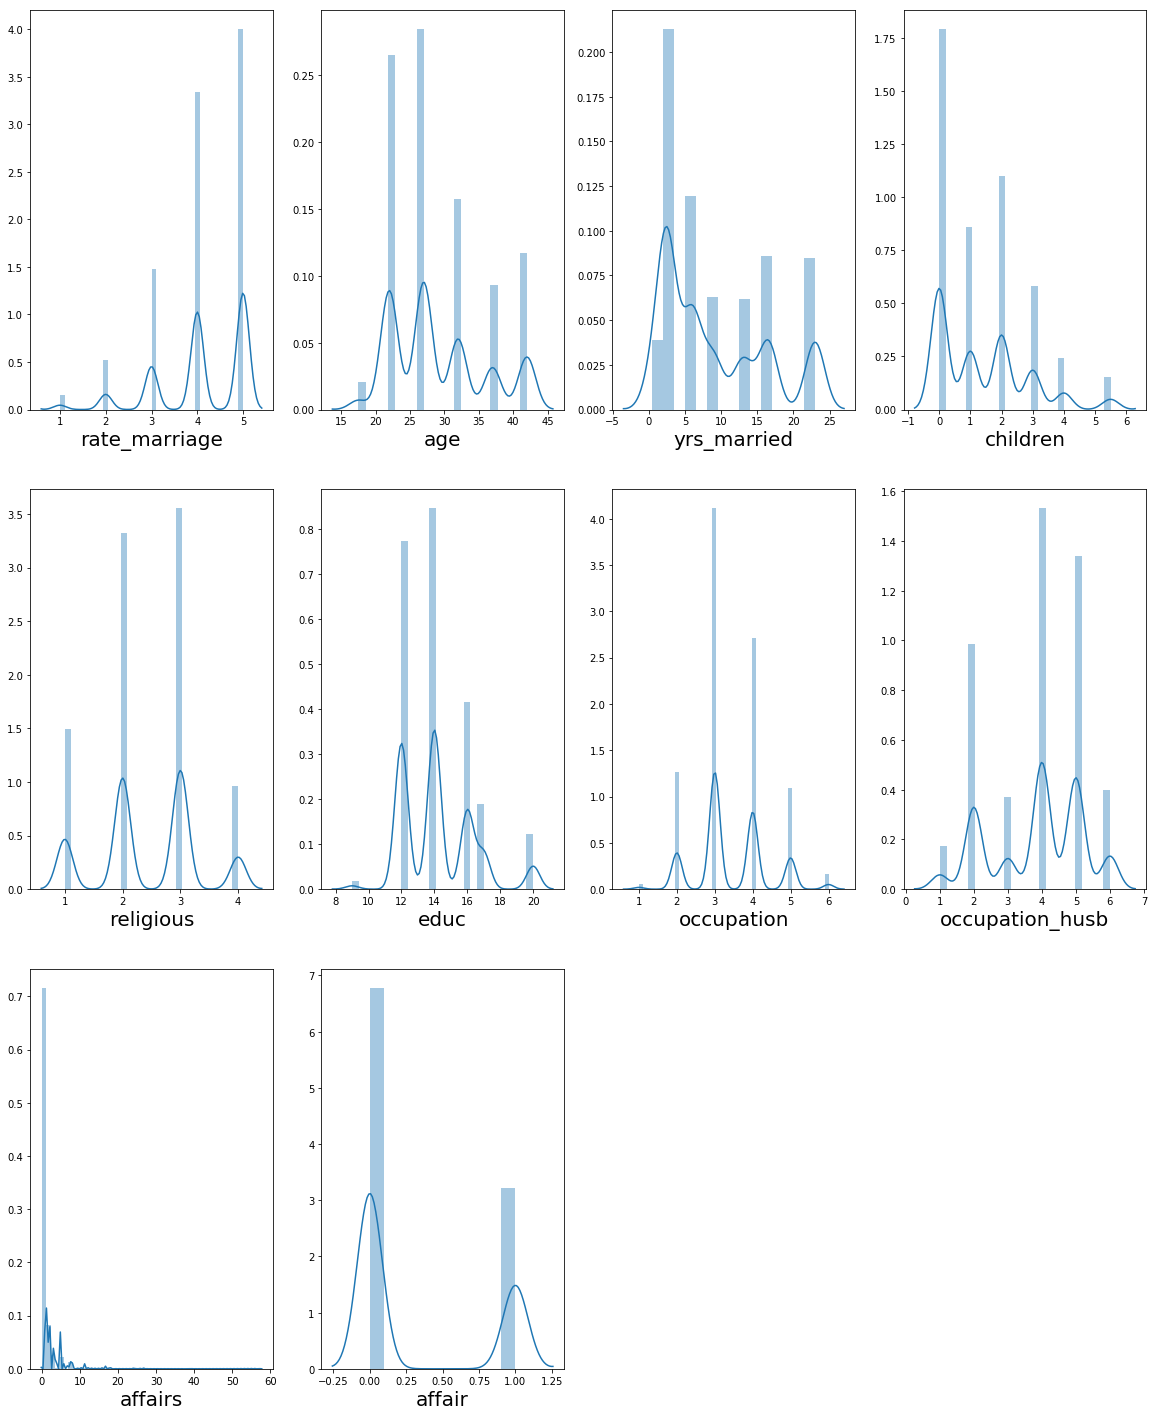

In [77]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=10 :     # as there are 10 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [71]:
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

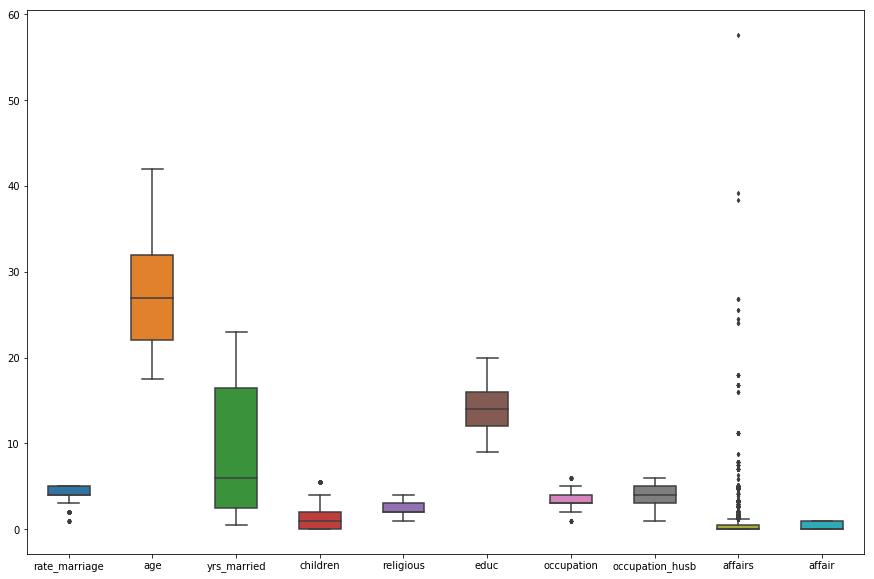

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
#data = data['']
#y = data['affair']
#x = data.drop(['affair'],a)

In [85]:
y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',
data, return_type="dataframe")

In [86]:
x

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [87]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [88]:
x = x.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 
 
'C(occupation)[T.3.0]':'occ_3', 
 
'C(occupation)[T.4.0]':'occ_4', 
 
'C(occupation)[T.5.0]':'occ_5', 
 
'C(occupation)[T.6.0]':'occ_6', 
 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 
 

In [89]:
x.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [96]:
x['Intercept']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
6336    1.0
6337    1.0
6338    1.0
6339    1.0
6340    1.0
6341    1.0
6342    1.0
6343    1.0
6344    1.0
6345    1.0
6346    1.0
6347    1.0
6348    1.0
6349    1.0
6350    1.0
6351    1.0
6352    1.0
6353    1.0
6354    1.0
6355    1.0
6356    1.0
6357    1.0
6358    1.0
6359    1.0
6360    1.0
6361    1.0
6362    1.0
6363    1.0
6364    1.0
6365    1.0
Name: Intercept, Length: 6366, dtype: float64

In [99]:
x = x.drop(['Intercept'],axis =1)

In [90]:
y = np.ravel(y) 
 

In [92]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [100]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)
X_scaled

array([[ 2.531984  , -0.88131913, -0.63614294, ...,  1.11844056,
         0.65334148,  1.28115287],
       [-0.3949472 ,  1.13466276, -0.63614294, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [-0.3949472 ,  1.13466276, -0.63614294, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 2.531984  , -0.88131913, -0.63614294, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [101]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,19.340780,occ_2
1,39.335618,occ_3
2,32.931910,occ_4
3,17.057165,occ_5
4,3.697959,occ_6
5,5.566292,occ_husb_2
6,2.991070,occ_husb_3
7,6.930281,occ_husb_4
8,6.577077,occ_husb_5
9,3.185266,occ_husb_6


In [105]:
df=pd.DataFrame(data=X_scaled, columns= x.columns)
df.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,2.531984,-0.881319,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364


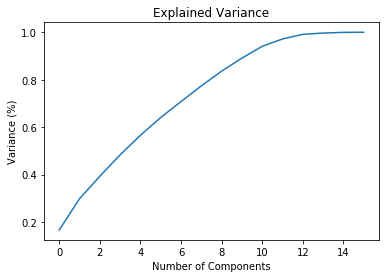

In [106]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [107]:
pca = PCA(n_components=9)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.262494,0.343191,0.739610,-1.508446,-0.809260,-0.002850,-0.119859,0.660821,-2.194456
1,0.425784,-1.208340,-0.385471,1.888783,-0.060742,0.604493,-0.591951,1.742071,0.186178
2,-1.757352,-0.336681,-1.984262,-0.937585,-0.167186,-0.105842,-0.759690,1.200389,-0.617695
3,2.760252,0.801706,-1.126253,-1.631713,-1.601474,1.264044,0.602499,-0.522660,0.801785
4,-0.878998,-0.872835,-0.547951,1.710450,-0.152418,0.623189,-0.479762,0.311487,-0.144700


In [113]:
principal_Df.shape

(6366, 9)

In [108]:
x_train,x_test,y_train,y_test = train_test_split(principal_Df,y, test_size= 0.25, random_state = 355)

In [109]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
y_pred = log_reg.predict(x_test)

In [111]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7110552763819096

In [112]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[968, 116],
       [344, 164]], dtype=int64)

In [114]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [115]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7110552763819096

In [116]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8929889298892989

In [117]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7378048780487805

In [118]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8080133555926544

In [119]:
auc = roc_auc_score(y_test, y_pred)
auc

0.607911787779295

In [120]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

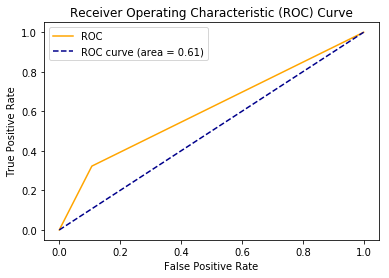

In [121]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()